# Seleçao conjunto de dados

Selecionar conjunto de dados adequado para problemas de agrupamento. Se o conjunto selecionado tiver o atributo classe, ele pode ser retirado

http://archive.ics.uci.edu/ml/datasets/Heart+Disease

Este banco de dados contém **76 atributos**, mas todos os experimentos publicados referem-se ao uso de um subconjunto de **14** deles. Em particular, o banco de dados de Cleveland é o único que tem sido usado por pesquisadores de ML para esta data.   
O campo "**objetivo**" refere-se à presença de doença cardíaca no paciente. É um **número inteiro com valor de 0 (sem presença) a 4**. Os experimentos com o banco de dados de Cleveland se concentraram em simplesmente tentar **distinguir a presença (valores 1,2,3,4) da ausência (valor 0)**.

# Ler o conjunto de dados

Ler o conjunto de dados no formato .csv coma função read.csv() (biblioteca Pandas)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
import pandas as pd
import io


df = pd.read_csv("/content/drive/MyDrive/MBA_data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Retirar a coluna referente ao atributo classe

Criar outra tabela de dados retirando a coluna referente às classes, se for necessário

In [13]:
y = df["target"]
X = df.drop(["target"], axis=1)

# Transformaçoes necessarias

Fazer as transformações que forem necessárias: transformar atributos nominais em binários com a função get_dummies() e normalizar os atributos contínuos com a função fit() da classe MinMaxScaler (biblioteca sklearn.preprocessing)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dicionarizaçao dos atributos:
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [15]:
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
num_cols = list(set(X.columns) - set(cat_cols))

In [16]:
X_encoded = pd.get_dummies(data = X, columns = cat_cols, drop_first = True)
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [19]:
from sklearn.preprocessing import MinMaxScaler


# Normalizar os atributos contínuos com MinMaxScaler()
mms = MinMaxScaler()
mms.fit(X_encoded)
X_transformed = pd.DataFrame(mms.transform(X_encoded), columns=X_encoded.columns)
X_transformed.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Definir um intervalo de valores para número de grupos

Definir um intervalo de valores para número de grupos (por exemplo, de 2 a 15, ou um intervalo maior caso seja necessário para visualizar a variação do índice no gráfico)

**[1, 30]** sera o nosso intervalo. Dependendo da forma da curva do metodo do cotovelo, a gente aumentara ou nao o nosso intervalo.

# Método do cotovelo

Aplicar o algoritmo k-means no conjunto de dados (sem a classe) para todos os valores do intervalo definido usando a classe Kmeans e a função fit() (biblioteca sklearn.cluster)

Coletar o valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados usando o atributo inertia_ do algoritmo Kmeans do Python.

Plotar o gráfico dos índices encontrados para cada número de grupos e determinar qual é o melhor de acordo com o método do cotovelo explicado na aula.

In [24]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Find optimal number of clusters
def find_optimal_k_elbow(df, chart_name):
    # Create empty sse dictionary
    sse = {}
    
    # Fit KMeans algorithm on k values between 1 and 11
    for k in range(1, 30):
        kmeans = KMeans(n_clusters=k, random_state=333)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
    
    # Add the title to the plot
    plt.title('Elbow criterion ' + chart_name + ' data chart')
    
    # Create and display a scatter plot
    xx = list(sse.keys())
    yy = list(sse.values())
    sns.pointplot(x=xx, y=yy)
    plt.show()
    return xx,yy

def optimal_number_of_clusters(x1, x2, y1, y2, wcss):
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2


def get_optimal_number_of_clusters(df, chart_name):
    xx, yy = find_optimal_k_elbow(df, chart_name)
    # calculating the within clusters sum-of-squares for 19 cluster amounts
    x1 = xx[0]
    y1 = yy[0]
    x2 = xx[len(xx)-1]
    y2 = yy[len(yy)-1]
    
    # calculating the optimal number of clusters
    n = optimal_number_of_clusters(x1, x2, y1, y2, yy)
    return n

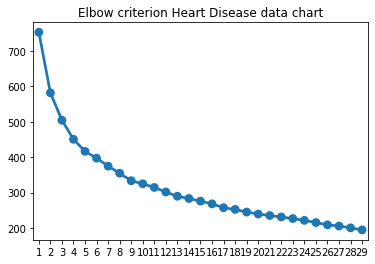

Quantidade de clusters otimal:  10


In [30]:
n = get_optimal_number_of_clusters(X_transformed, chart_name="Heart Disease")
print("Quantidade de clusters otimal: ", n)

In [29]:
#Agrupar com KMeans e mostrar os centros obtidos
km = KMeans(n_clusters=10)
km = km.fit(X_transformed)
centers = km.cluster_centers_
y_pred = km.labels_
print(centers)
print(y_pred[0])

[[ 4.32870370e-01  3.34381551e-01  2.56891595e-01  6.99462822e-01
   6.33213859e-02  1.66666667e-01  6.29629630e-01  5.55111512e-17
   1.00000000e+00  2.77555756e-17  1.48148148e-01  1.00000000e+00
   5.20417043e-18  3.70370370e-02  1.11022302e-16  9.62962963e-01
  -4.16333634e-17  1.00000000e+00  5.55111512e-17]
 [ 5.49537037e-01  3.86373166e-01  3.01319127e-01  4.60559796e-01
   3.31182796e-01  2.55555556e-01  8.22222222e-01  1.94289029e-16
   8.88888889e-02  2.22222222e-02  1.77777778e-01  4.66666667e-01
   2.22222222e-02  1.00000000e+00  8.66666667e-01  0.00000000e+00
  -4.85722573e-17 -2.22044605e-16  9.77777778e-01]
 [ 5.07478632e-01  3.38171263e-01  2.50497600e-01  6.58250147e-01
   1.05459057e-01  1.79487179e-01  9.74358974e-01  1.79487179e-01
   2.05128205e-01  2.56410256e-02  2.05128205e-01  6.41025641e-01
   3.46944695e-18  3.84615385e-01 -5.55111512e-17  9.48717949e-01
  -4.16333634e-17 -1.11022302e-16  1.00000000e+00]
 [ 5.54761905e-01  3.27762803e-01  2.57469015e-01  5.68